In [1]:
%pylab inline
import sympy
import symcontrol as cn
sympy.init_printing()

Populating the interactive namespace from numpy and matplotlib


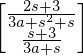

In [2]:
a = sympy.symbols('a')
tf = sympy.Matrix([
    cn.TransferFunction([2, 3], [1, 1, 3*a]),
    cn.TransferFunction([1, 3], [1, 3*a])])
tf

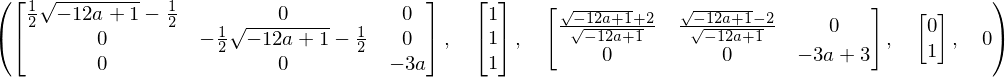

In [3]:
ss1 = cn.tf2ss(tf)
ss1

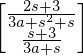

In [4]:
cn.ss2tf(ss1)

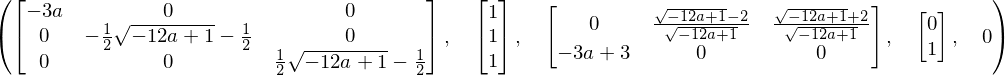

In [5]:
ssJ, T = cn.jordan_canonical_form(ss1)
ssJ

In [6]:
def ctrb(ss, n=None):
    if n is None:
        n = ss.A.shape[0]
    O_ctrb = ss.B
    for i in range(n-1):
        O_ctrb = O_ctrb.row_join(ss.A**n*ss.B)
    return O_ctrb

In [7]:
def obsvb(ss, n=None):
    if n is None:
        n = ss.A.shape[0]
    O_ctrb = ss.C
    for i in range(n-1):
        O_ctrb = O_ctrb.row_join(ss.C*ss.A**n)
    return O_ctrb

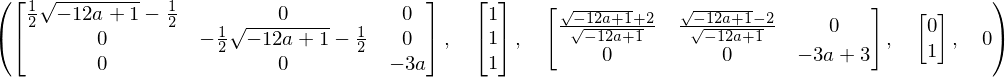

In [8]:
ss1.simplify()
ss1